In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
with open("binarymatrix.npy", "br") as f:
    narrowband= np.load(f)

frequency_width = 300
threshold = 3
start_fre = 3000
end_fre = 10000

fs = 96000
fft_number = 1024

f = np.arange(1024/2+1)*fs/1024

df = fs/fft_number

start_fre = 2000
end_fre = 10000

start_index = math.floor((start_fre)/df)
end_index = math.ceil((end_fre)/df)
width_size = math.ceil(frequency_width/2/df)

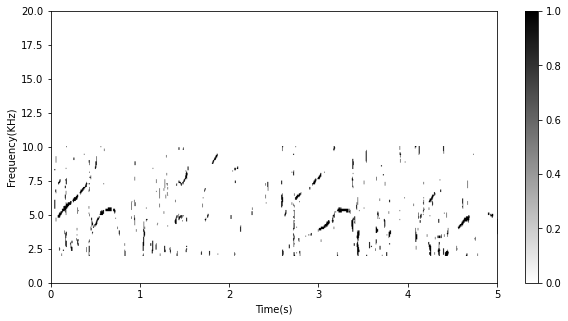

In [3]:
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(narrowband.T, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

In [4]:
time_duration = 0.01
hop_size = 512
dt = hop_size/96000


col_size = math.ceil(time_duration/dt)
row_size = math.ceil(frequency_width/df)

In [5]:
print("col size: {}".format(col_size))
print("row size: {}".format(row_size))

col size: 2
row size: 4


In [6]:
from scipy import ndimage
mask = np.ones((col_size, row_size))
# mask = np.array([[1,2,3,4],[1,2,3,4]])
long_time_duration = ndimage.convolve(narrowband.astype("uint8"), mask, mode="constant", cval=0)

In [41]:
threshold = 1
matrix = long_time_duration > threshold

In [29]:
mask_1 = np.array([[0,0,1],[0,1,0],[1,0,0]]).T
long_time_duration = ndimage.convolve(narrowband.astype("uint8"), mask_1, mode="constant", cval=0)
threshold = 2
matrix_1 = long_time_duration > threshold

mask_2 = np.array([[0,0,0],[1,1,1],[0,0,0]]).T
long_time_duration = ndimage.convolve(narrowband.astype("uint8"), mask_2, mode="constant", cval=0)
threshold = 2
matrix_2 = long_time_duration > threshold

mask_3 = np.array([[1,0,0],[0,1,0],[0,0,1]]).T
long_time_duration = ndimage.convolve(narrowband.astype("uint8"), mask_3, mode="constant", cval=0)
threshold = 2
matrix_3 = long_time_duration > threshold

col size: 4
row size: 2


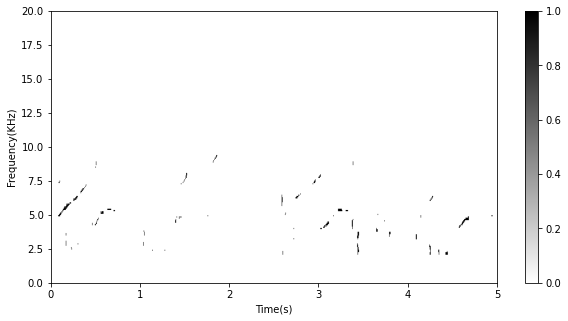

In [31]:
from scipy import ndimage
time_duration = 0.02
frequency_width = 150

hop_size = 512
dt = hop_size/96000

col_size = math.ceil(time_duration/dt)
row_size = math.ceil(frequency_width/df)

print("col size: {}".format(col_size))
print("row size: {}".format(row_size))
# mask = np.ones((col_size, row_size))
# mask = np.array([[1,2,3,4],[1,2,3,4]]).T
# mask = np.array([[0,0,1],[0,1,0],[1,0,0]])
# long_time_duration = ndimage.convolve(narrowband.astype("uint8"), mask, mode="constant", cval=0)
# matrix = long_time_duration > threshold
matrix = (matrix_1.astype("uint8") + matrix_2.astype("uint8") + matrix_3.astype("uint8"))>1
fs = 96000
fig, ax = plt.subplots(figsize=(10,5))
im = ax.imshow(matrix.T, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 5, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()